In [5]:
import pandas
import numpy

dataFrame = pandas.read_csv("us-minimum.zip", encoding='latin')

act_min_wage = pandas.DataFrame()

for name, group in dataFrame.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, numpy.NaN).dropna(axis=1).corr()

min_wage_corr.head() 

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


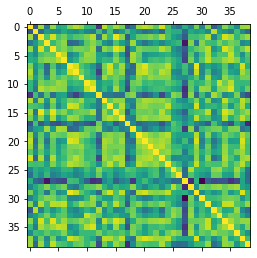

In [6]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

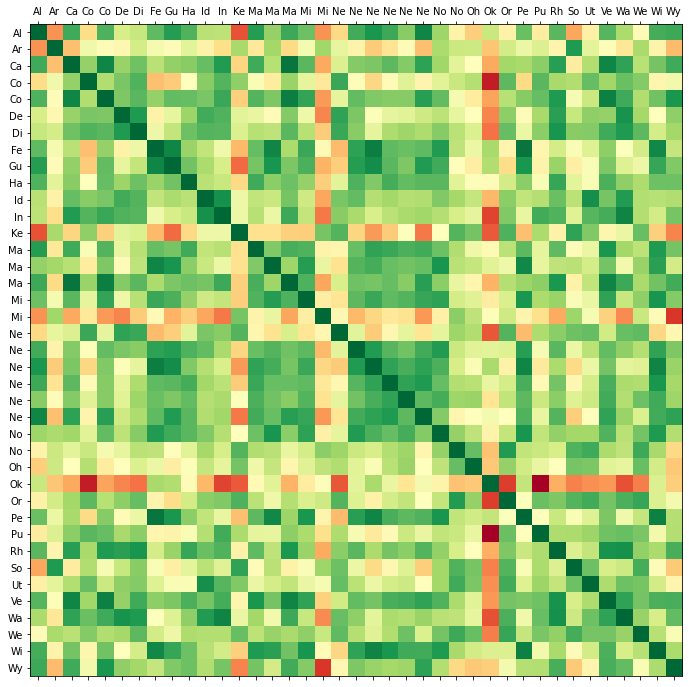

In [18]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_yticks(numpy.arange(len(labels)))
ax.set_xticks(numpy.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()